# O$_2$scl table example for O$_2$sclpy

See the O$_2$sclpy documentation at
https://awsteiner.org/code/o2sclpy for more information.

In [1]:
import o2sclpy
import matplotlib.pyplot as plot
import sys

plots=True
if 'pytest' in sys.modules:
    plots=False

Link the o2scl library:

In [2]:
link=o2sclpy.linker()
link.link_o2scl()

Create an HDF5 file object and open the table in O$_2$scl's data file for the Akmal, Pandharipande, and Ravenhall equation of state. The `open()` function for the `hdf_file` class is documented [here](https://awsteiner.org/code/o2sclpy/hdf.html#o2sclpy.hdf_file.open).

In [3]:
hf=o2sclpy.hdf_file(link)
hf.open(link.o2scl_settings.get_data_dir()+b'apr98.o2')

We create a table object and specify a blank name to indicate
that we just want to read the first table in the file.

In [4]:
tab=o2sclpy.table(link)
name=b''

Read the table:

In [5]:
o2sclpy.hdf_input_table(link,hf,tab,name)

Close the HDF5 file.

In [6]:
hf.close()

We use the `cap_cout` class to capture `std::cout` to the Jupyter notebook. The `summary()` function lists the columns in the table.

In [7]:
cc=o2sclpy.cap_cout()
cc.open()
tab.summary()
cc.close()

Contents of std::cout:
0 constants:
3 columns: 
0. rho  1. nuc  2. neut 
13 lines of data.



Finally, we use `matplotlib` to plot the data stored in the table:

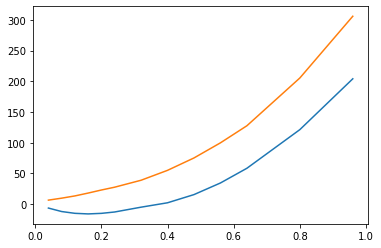

In [8]:
if plots:
    plot.plot(tab['rho'],tab['nuc'])
    plot.plot(tab['rho'],tab['neut'])
    plot.show()